In [ ]:
import keras
import os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
import numpy as np

In [ ]:
import zipfile

with zipfile.ZipFile("/content/drive/MyDrive/Colab Notebooks/training_set.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/drive/MyDrive/Colab Notebooks/")

from keras.preprocessing.image import ImageDataGenerator

trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="/content/drive/MyDrive/Colab Notebooks/training_set/", target_size=(224, 224))


Found 480 images belonging to 2 classes.


In [ ]:
import zipfile

with zipfile.ZipFile("/content/drive/MyDrive/Colab Notebooks/test_set.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/drive/MyDrive/Colab Notebooks/")

from keras.preprocessing.image import ImageDataGenerator

tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="/content/drive/MyDrive/Colab Notebooks/test_set/", target_size=(224, 224))

Found 121 images belonging to 2 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [ ]:
model.add(Flatten())
model.add(Dense(units=4096, activation="relu"))
model.add(Dense(units=4096,activation="relu"))
#model.add(Dense(units=2, activation="softmax"))
model.add(Dense(units=2, activation="sigmoid"))

In [ ]:
from keras.optimizers import Adam
opt = Adam(learning_rate=0.0001)
#model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])
model.compile(optimizer=opt, loss=keras.losses.binary_crossentropy, metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 128)       0         
 g2D)                                                   

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint_path = "/content/drive/MyDrive/Colab Notebooks/vgg16_1a.h5"
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', save_freq='epoch')
early = EarlyStopping(monitor='val_accuracy',min_delta=0,patience=20,verbose=1,mode='auto')
hist=model.fit_generator(steps_per_epoch=len(traindata),generator=traindata,validation_data=testdata,validation_steps=len(testdata),epochs=7,callbacks=[checkpoint,early])


<ipython-input-8-785b287eb4dd>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist=model.fit_generator(steps_per_epoch=len(traindata),generator=traindata,validation_data=testdata,validation_steps=len(testdata),epochs=7,callbacks=[checkpoint,early])


Epoch 1/7
15/15 [==============================] - ETA: 0s - loss: 0.8927 - accuracy: 0.4938 
Epoch 1: val_accuracy improved from -inf to 0.49587, saving model to /content/drive/MyDrive/Colab Notebooks/vgg16_1a.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


15/15 [==============================] - 708s 47s/step - loss: 0.8927 - accuracy: 0.4938 - val_loss: 0.6941 - val_accuracy: 0.4959
Epoch 2/7
15/15 [==============================] - ETA: 0s - loss: 0.6938 - accuracy: 0.5063 
Epoch 2: val_accuracy did not improve from 0.49587
15/15 [==============================] - 742s 50s/step - loss: 0.6938 - accuracy: 0.5063 - val_loss: 0.6928 - val_accuracy: 0.4959
Epoch 3/7
15/15 [==============================] - ETA: 0s - loss: 0.6952 - accuracy: 0.4792 
Epoch 3: val_accuracy did not improve from 0.49587
15/15 [==============================] - 732s 49s/step - loss: 0.6952 - accuracy: 0.4792 - val_loss: 0.6926 - val_accuracy: 0.4876
Epoch 4/7
15/15 [==============================] - ETA: 0s - loss: 0.6914 - accuracy: 0.5604 
Epoch 4: val_accuracy did not improve from 0.49587
15/15 [==============================] - 733s 49s/step - loss: 0.6914 - accuracy: 0.5604 - val_loss: 0.6892 - val_accuracy: 0.4959
Epoch 5/7
15/15 [========================

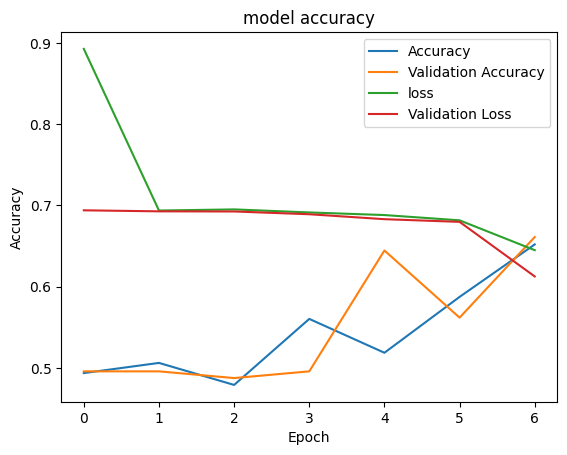

In [9]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

1/1 [==============================] - 1s 613ms/step
cat


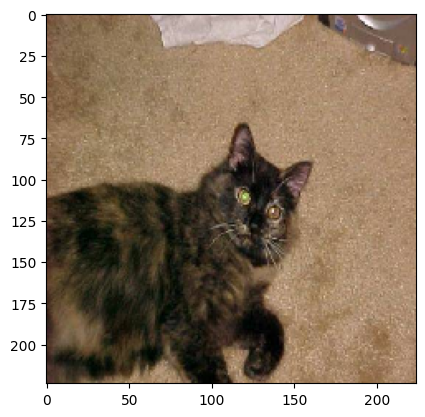

In [10]:
import matplotlib.pyplot as plt
from keras.preprocessing import image
import numpy as np

img = image.load_img("/content/drive/MyDrive/Colab Notebooks/test_set/cats/cat.4004.jpg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
saved_model = load_model("/content/drive/MyDrive/Colab Notebooks/vgg16_1a.h5")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("cat")
else:
    print('dog')

1/1 [==============================] - 1s 516ms/step
dog


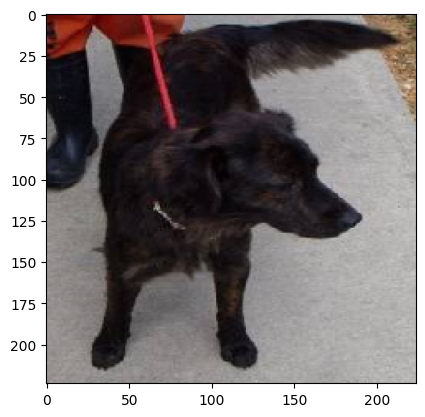

In [11]:
import matplotlib.pyplot as plt
from keras.preprocessing import image
import numpy as np

img = image.load_img("/content/drive/MyDrive/Colab Notebooks/test_set/dogs/dog.4007.jpg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
saved_model = load_model("/content/drive/MyDrive/Colab Notebooks/vgg16_1a.h5")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("cat")
else:
    print('dog')